# Handwritten number classification

This exercise uses ML algorithms to classify handwritten numbers. This exercise uses the popular MNIST dataset.

In [1]:
# The sklearn package has some useful methods to fetch many different datasets.
# By default, these are stored in $HOME/scikit_learn_data/
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', parser='auto')


In [2]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
mnist.details

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'description_version': '1',
 'format': 'ARFF',
 'creator': ['Yann LeCun', 'Corinna Cortes', 'Christopher J.C. Burges'],
 'upload_date': '2014-09-29T03:28:38',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/52667/mnist_784.arff',
 'parquet_url': 'http://openml1.win.tue.nl/dataset554/dataset_554.pq',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'minio_url': 'http://openml1.win.tue.nl/dataset554/dataset_554.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:12:09',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

In [4]:
X,Y = mnist.data, mnist.target

In [5]:
# This is the data.
# One row per instance and one column per feature.
X.shape

(70000, 784)

- there are 70k images with 784 pixels each
- $28 \times 28 = 784$ pixels
- resolution = 28x28 pixels

In [6]:
Y.shape

(70000,)

- the `target` attribute contains an array on labels
- it has the same number of rows

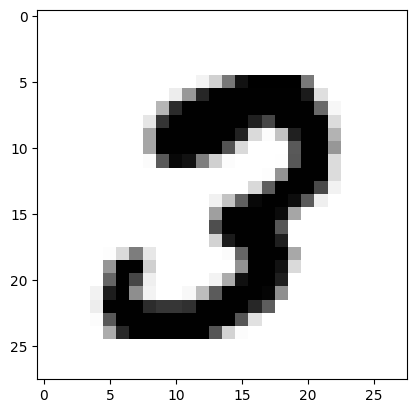

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

digit = np.array(X.iloc[12345]).reshape(28, 28)

plt.imshow(digit, cmap=matplotlib.cm.binary)

# Split test and validation data

Its important to split the data into a test and a training dataset. The first 60k images will ne used for training and the last 10k for validation.

In [8]:
X_train, X_validation = X.iloc[:60_000], X.iloc[60_000:]
Y_train, Y_validation = Y.iloc[:60_000], Y.iloc[60_000:]

# Delete the old datasets in order to prevent me from using them accidentally
del X, Y

In [9]:
# The numbers are unordered
for index in range(0, len(Y_train), 500):
    print(f'Index {index}: {Y_train.iloc[index]}')

Index 0: 5
Index 500: 3
Index 1000: 0
Index 1500: 9
Index 2000: 5
Index 2500: 0
Index 3000: 9
Index 3500: 5
Index 4000: 7
Index 4500: 0
Index 5000: 7
Index 5500: 1
Index 6000: 6
Index 6500: 3
Index 7000: 8
Index 7500: 2
Index 8000: 0
Index 8500: 6
Index 9000: 6
Index 9500: 6
Index 10000: 3
Index 10500: 1
Index 11000: 6
Index 11500: 5
Index 12000: 7
Index 12500: 0
Index 13000: 7
Index 13500: 4
Index 14000: 1
Index 14500: 6
Index 15000: 5
Index 15500: 6
Index 16000: 8
Index 16500: 8
Index 17000: 3
Index 17500: 2
Index 18000: 4
Index 18500: 9
Index 19000: 8
Index 19500: 3
Index 20000: 5
Index 20500: 3
Index 21000: 7
Index 21500: 4
Index 22000: 3
Index 22500: 2
Index 23000: 7
Index 23500: 6
Index 24000: 8
Index 24500: 7
Index 25000: 3
Index 25500: 7
Index 26000: 4
Index 26500: 7
Index 27000: 5
Index 27500: 5
Index 28000: 1
Index 28500: 4
Index 29000: 2
Index 29500: 2
Index 30000: 3
Index 30500: 9
Index 31000: 6
Index 31500: 6
Index 32000: 8
Index 32500: 6
Index 33000: 3
Index 33500: 3
Inde

# Multiclass Classification

- **binary classifiers** (SGD) can distinguish two classes (e.g. 7 or 3)
- **multiclass classifiers** can distinguish multiple classes
- the **one-versus-all** strategy means to use **N** binary classifiers for this purpose
  - for 10 numbers train 10 binary classifiers -> one for each number
  - then for each number compute the decision score for each classifier
  - finally, select the class with the highest score 

In [10]:
from sklearn.linear_model import SGDClassifier

# Create an instance of the SGDClassifier
clf = SGDClassifier(random_state=42)

# Train the classifier on the training data.
# Scikit automaitcally detects that I want to perform multiclass classification.
# The selects one-versus-all strategy by default
clf.fit(X_train.values, Y_train)

SGDClassifier(random_state=42)

In [11]:
import random

random_index = random.choice(X_train.index)
random_digit = X_train.loc[random_index]
random_digit_label = Y_train.iloc[random_index]

print(f'The model predicts: {clf.predict([random_digit])[0]}')
print(f'The actual label is: {random_digit_label}')


The model predicts: 1
The actual label is: 1


Under the hood the classifier above trained ten binary classifiers. One for each number 0-9. Then it computes the decision scores for each classifier and selects the maximum.

This can be shown by calling `.decision_function()` instead of `.predict()`. This method returns the scores for all classifiers.

In [12]:
clf.decision_function([random_digit])

array([[-56564.39939804,  11770.5348058 ,  -5959.51606184,
           320.87116003,  -9030.76209552,  -4090.43128662,
         -5221.76959532, -13521.77270286,   -249.61173198,
         -4374.4406201 ]])

## Accuracy

Using **cross validation** I can assess the performance of a **predictive model**. <mark>It involves dividing the dataset into multiple subsets, training the model on some of these subsets, and testing it on others.</mark>

KFold is a type of cross-validation where the dataset is divided into 'k' subsets or folds. The model is trained and tested 'k' times, each time using a different fold as the test set and the remaining folds as the training set. It helps to ensure that each data point is used for both training and testing at least once.

StratifiedKFold is a variation of KFold that ensures that the class distribution in the original dataset is preserved in each fold.
This is particularly important when dealing with imbalanced datasets where one class is much more frequent than the others.

The latter is important. 


In [16]:
from sklearn.base import clone
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

def cross_val(X, y, classifier):
    # n_splits=3: how many times the dataset is split into training and testing sets
    skfold = StratifiedKFold(n_splits=3, random_state=1337, shuffle=True)
    
    accuracies = []

    for fold, (train_indices, test_indices) in enumerate(skfold.split(X, y)):
        # Split the test data
        X_train_folds, X_test_folds = X[train_indices], X[test_indices]
        y_train_folds, y_test_folds = y[train_indices], y[test_indices]
    
        # Clone the classifier that was passed
        clone_clf = clone(classifier)
        clone_clf.fit(X_train_folds, y_train_folds)
    
        # Make predictions on the test data
        y_pred_folds = classifier.predict(X_test_folds)
    
        # Calculate accuracy for this fold and store it
        accuracy = accuracy_score(y_test_folds, y_pred_folds)
        accuracies.append(accuracy)
    
        print(f"Fold {fold+1}: Accuracy = {accuracy:.2f}")

    # Calculate the average accuracy across all folds
    average_accuracy = np.mean(accuracies)
    print(f"Average Accuracy: {average_accuracy:.2f}")


In [17]:
cross_val(X_train.values, Y_train, clf)

Fold 1: Accuracy = 0.88
Fold 2: Accuracy = 0.88
Fold 3: Accuracy = 0.88
Average Accuracy: 0.88


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train.values, Y_train, cv=3, scoring='accuracy')